In [70]:
import pickle
import numpy as np
import pandas as pd
import mne
from matplotlib import pyplot as plt

In [71]:
with open('python/methods.py', 'r') as file:
    exec(file.read())

In [72]:
data = read_pickle('output/spontaneous-movement/W1/C1/emg/filter.pkl')
events = read_pickle('output/spontaneous-movement/W1/C1/emg/final_movement.pkl')

In [73]:
events

,EventStart,EventEnd,Movement,EventLength,Start,End,Length,Channel,Amplitude,AmplitudeBefore,AmplitudeAfter,MeanAmplitudeDiff
0,109148.0,160437.0,True,51289.0,5.45740,8.02185,2.56445,2019_12_09t2I0_1,0.575932,0.176758,0.221135,0.376986
1,60531.0,85125.0,True,24594.0,3.02655,4.25625,1.22970,2019_12_09t2I0_2,0.929745,0.197876,0.227533,0.717041
2,151814.0,199999.0,True,48185.0,7.59070,9.99995,2.40925,2019_12_09t2I0_4,0.527997,0.192604,0.213238,0.325076
3,52123.0,82613.0,True,30490.0,2.60615,4.13065,1.52450,2019_12_09t2I0_6,0.579122,0.186131,0.155222,0.408446
4,116200.0,134260.0,True,18060.0,5.81000,6.71300,0.90300,2019_12_09t2I0_6,0.732693,0.153914,0.151166,0.580153
5,13696.0,56646.0,True,42950.0,0.68480,2.83230,2.14750,2019_12_09t2I0_7,0.700909,0.194777,0.142081,0.532480
6,56161.0,80753.0,True,24592.0,2.80805,4.03765,1.22960,2019_12_09t2I0_10,0.901712,0.179396,0.178004,0.723012
7,194692.0,199999.0,True,5307.0,9.73460,9.99995,0.26535,2019_12_09t2I0_10,0.640637,0.186093,0.087751,0.503715
8,144767.0,174504.0,True,29737.0,7.23835,8.72520,1.48685,2019_12_09t2I0_11,0.910677,0.227887,0.163075,0.715196
9,178527.0,194669.0,True,16142.0,8.92635,9.73345,0.80710,2019_12_09t2I0_11,0.813609,0.162935,0.156398,0.653943


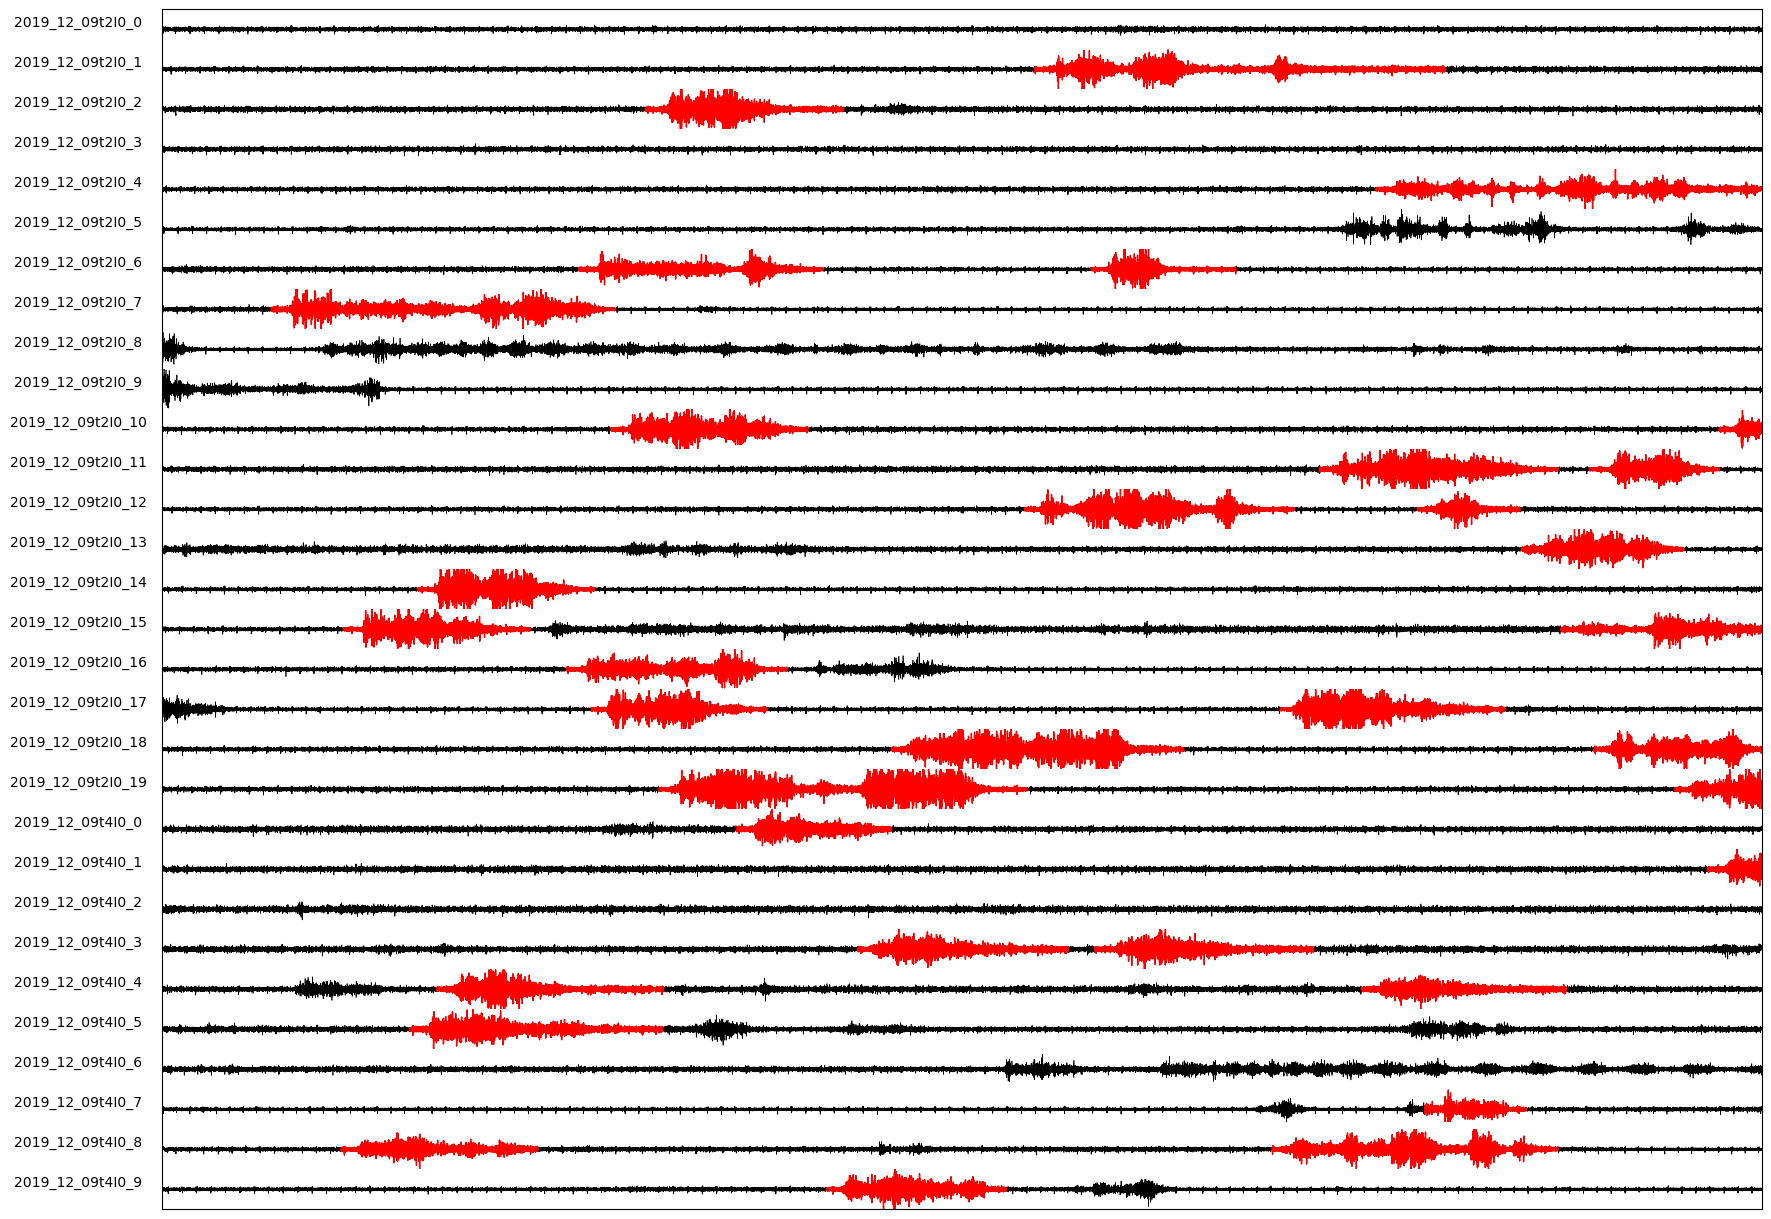

In [74]:
figure, axes = plt.subplots(nrows = len(data.ch_names), figsize = (20, 0.5 * len(data.ch_names)))
plt.subplots_adjust(
    left = 0.1,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0,
    hspace = 0
)

x = data.times

has_label = False

for i, channel in enumerate(data.ch_names):
    move_events = events[events['Channel'] == channel]

    y = data.get_data(picks = [i])[0]

    axes[i].plot(x, y, linewidth = 0.5, color = 'black')
    axes[i].set_ylim(-4, 4)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])
    axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')
    axes[i].set_xlim(0, 10)

    for index, row in move_events.iterrows():
        start = int(row['EventStart'])
        end = int(row['EventEnd'])

        if has_label:
            axes[i].plot(x[start:end], y[start:end], linewidth = 1, color = 'red')
        else:
            has_label = True
            axes[i].plot(x[start:end], y[start:end], linewidth = 1, color = 'red', label = 'Movement')

    if i != 0:
        axes[i].spines['top'].set_visible(False)

    if i != len(data.ch_names) - 1:
        axes[i].spines['bottom'].set_visible(False)

plt.show()